## Implementation

In [1]:
# Import thư viện
import numpy as np # ĐSTT
import random 
import matplotlib.pyplot as plt # Visualize
from sklearn.datasets import make_blobs # Make the dataset

Text(0.5, 1.0, 'Dataset')

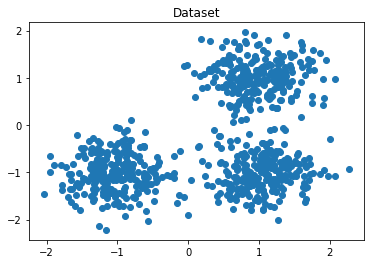

In [2]:
# Tạo dữ liệu
# Init original centroids
true_centroids = [[1, 1], [-1, -1], [1, -1]] 

# dataset
X, true_labels = make_blobs(n_samples=750, centers=true_centroids, 
                            cluster_std=0.4, random_state=0)

# predict labels
labels = []

# Visualize dữ liệu
plt.plot(X[:,0],X[:,1],'o')
plt.title('Dataset')

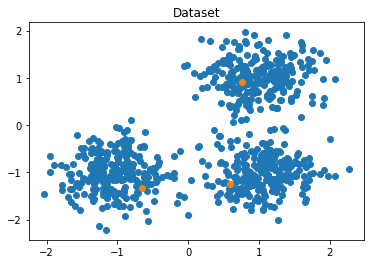

In [3]:
# Giả sử với bộ dữ liệu trên, ta khởi tạo K = 3 là số cụm 
# và sẽ thu các tâm cụm tương ứng với giá trị ngẫu nhiên 
# trong tập dữ liệu ban đầu
# Init random centroids
def init_centroids(K):
    centroids = []
    K = 3
    for i in range(K):
        x = random.sample(list(X), 1)
        centroids.append(x[0])
    centroids = np.array(centroids)
    return centroids

K = 3
centroids = init_centroids(K)
# Visualize dữ liệu
# Màu vàng: khởi tạo cụm ngẫu nhiên
# Màu xanh: dữ liệu ban đầu
plt.plot(X[:,0],X[:,1],'o')
plt.title('Dataset')
plt.plot(centroids[:,0],centroids[:,1],'o')

In [4]:
# Tính khoảng cách Euclid 2 điểm
def distance(p1,p2):
    return np.linalg.norm(p1-p2,2)

In [5]:
# Tiếp theo ta cần tính toán khoảng cách của từng điểm dữ liệu với từng centroids, 
# khoảng cách ngắn nhất của điểm dữ liệu với từng centroids sẽ được coi là nhãn của điểm dữ liệu đó.
def update_labels(X):
    labels = []
    for i in range(len(X)):
        fake_distance = 999999
        label = -1
        for j in range(len(centroids)):
            d = distance(X[i],centroids[j])
            if d < fake_distance:
                fake_distance = d
                label = j
        labels.append(label)
    return labels

In [6]:
# Sau khi đã lấy nhãn cho toàn bộ dữ liệu, ta cần cập nhật giá trị tâm cụm bằng cách 
# tính trung bình cộng của những điểm dữ liệu thuộc nhãn của cụm.
# Update centroids
def update_centroids(centroids, X, labels):
    before_centroids = centroids.copy()
    for i in range(len(centroids)):
        count = 0
        x0 = 0
        y0 = 0
        for j in range(len(X)):
            if i == labels[j]:
                count += 1
                x0 += X[j][0]
                y0 += X[j][1]
        if count == 0:
            break
        x0 /= count
        y0 /= count
        centroids[i][0] = x0
        centroids[i][1] = y0
    return centroids, before_centroids

In [7]:
# Cuối cùng là điều kiện dừng của thuật toán, 
# ở đây ta sét cho tới khi giá trị của centroids không đổi thì sẽ dừng.
# When stop
def stop(centroids,new_centroids):
    return (set([tuple(a) for a in centroids]) == 
        set([tuple(a) for a in new_centroids]))

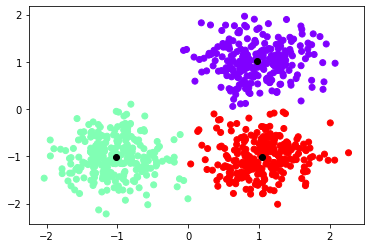

In [8]:
# Các hàm quan trọng của bài toán đã được hoàn thành
# lắp ghép để tìm nghiệm bài toán
while True:
    labels = update_labels(X)
    centroids, before_centroids = update_centroids(centroids, X, labels)
    if stop(centroids, before_centroids):
        break
# màu đen: là tâm cụm tối ưu nhất tìm được
# màu khác: nhãn tương ứng của các điểm dữ liệu ban đầu
plt.scatter(X[:,0], X[:,1], c = labels, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], color='black')

## Thư viên Sklearn

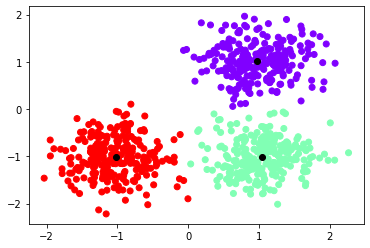

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Visualize
from sklearn.datasets import make_blobs # Make the dataset

# Init original centroids
true_centroids = [[1, 1], [-1, -1], [1, -1]] 

# dataset
X, true_labels = make_blobs(n_samples=750, centers=true_centroids, 
                            cluster_std=0.4, random_state=0)
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

labels = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = labels, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], color='black')